# Cycling Data Analysis
## Workflow Example for Reproducible Analyses

Based on [Youtube Series by Jake Vanderplas](https://www.youtube.com/watch?v=_ZEWDGpM-vM&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ) but updated to focus on analysis of bridge use pre/post COVID-19.

In [1]:
import os
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# Link to data that can be retrieved without a file path and/or clicks
# e.g. URL, database, etc.
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

# This function downloads the data and puts it in the repo if it doesn't already exist
def get_fremont_data(filename='fremont-bridge.csv',url=URL,force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(URL,filename)
    data = pd.read_csv('fremont-bridge.csv',index_col='Date',parse_dates=True)
    # The columns are bit long so we can make them shorter
    data.columns = ['Total','East Sidewalk','West Sidewalk']
    return data

In [2]:
# Get the data
data = get_fremont_data()

<Figure size 720x720 with 0 Axes>

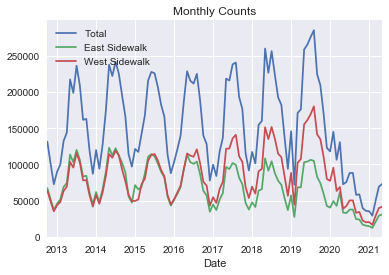

In [3]:
# Quick visualizations
plt.figure(figsize=(10,10))

# Plot monthly totals
data.resample('M').sum().plot(title='Monthly Counts')
plt.show()

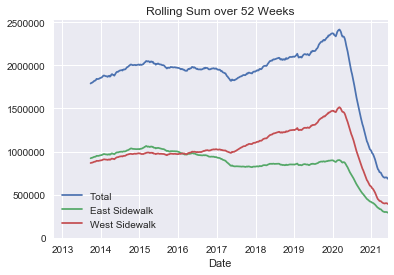

In [4]:
# Rolling sum over 52 weeks of data
# Each point on the plot is the sum of the previous 52 weeks
ax = data.resample('W').sum().rolling(52).sum().plot(title='Rolling Sum over 52 Weeks')
ax.set_ylim(0,None)
plt.show()

In [5]:
# Split data pre-covid and post-covid
# We'll say that covid started on 3/01/2020
covid_start_date = '2021-03-01'
pre_covid = data[data.index < covid_start_date]
post_covid = data[data.index > covid_start_date]

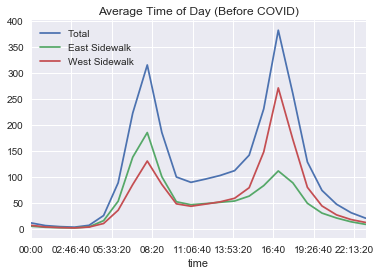

In [6]:
# Across the entire dataset, average the time that riders are using the bridge
pre_covid.groupby(pre_covid.index.time).mean().plot(title='Average Time of Day (Before COVID)')
plt.show()

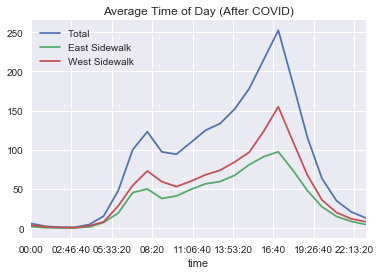

In [7]:
# Across the entire dataset, average the time that riders are using the bridge
post_covid.groupby(post_covid.index.time).mean().plot(title='Average Time of Day (After COVID)')
plt.show()

In [8]:
# There is definitely a major change before and after COVID

# Let's put the Total Riders data from the post COVID dataframe in a pivot table
# This is a 2D dataframe where each column is a day and each row is an hour during that day
pivoted_post_covid = post_covid.pivot_table('Total', index=post_covid.index.time,columns = post_covid.index.date)

# Look at the first few days of data
pivoted_post_covid.iloc[0:24,0:5]

,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05
00:00:00,NaN,0.0,2.0,5.0,3.0
01:00:00,0.0,1.0,1.0,1.0,0.0
02:00:00,0.0,2.0,0.0,1.0,0.0
03:00:00,1.0,1.0,0.0,0.0,0.0
04:00:00,6.0,2.0,5.0,5.0,2.0
05:00:00,16.0,19.0,17.0,19.0,17.0
06:00:00,40.0,44.0,48.0,43.0,23.0
07:00:00,104.0,105.0,113.0,103.0,75.0
08:00:00,130.0,126.0,144.0,130.0,74.0
09:00:00,72.0,77.0,102.0,53.0,46.0


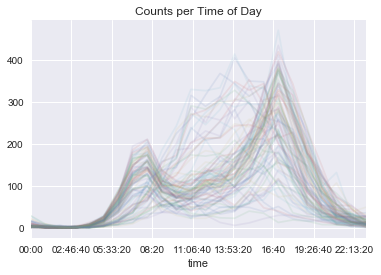

In [9]:
# Plot the pivot table data. 
# This will give us a line for each day of the year.
pivoted_post_covid.plot(legend=False,alpha=0.1,title='Counts per Time of Day')
plt.show()